**Reproduction of:**

**Deep Convolutional Neural Networks and Data Augmentation for Environmental  Sound Classification** 

Justin Salamon and Juan Pablo Bello

Some code taken from https://github.com/jaron/deep-listening/blob/master/4-us8k-cnn-salamon.ipynb

# Load dataset & set enviroment

In [0]:
!wget -O UrbanSound8K.tar.gz https://goo.gl/8hY5ER
!tar -xvf UrbanSound8K.tar.gz
!rm UrbanSound8K.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fold4/185909-2-0-34.wav
UrbanS

In [0]:
# get latest librosa version for audio preprocessing
!pip install --upgrade librosa

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for librosa: filename=librosa-0.7.2-cp36-none-any.whl size=1612885 sha256=4e403e9015e4df5711ad789c3acab7cb67265978dacd44447b5ee84f7570bc6b
  Stored in directory: /root/.cache/pip/wheels/4c/6e/d7/bb93911540d2d1e44d690a1561871e5b6af82b69e80938abef
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [0]:
!git clone https://github.com/grudloff/Salomon2017Replication.git
!mv Salomon2017Replication/*.py .
!rm Salomon2017Replication -r

Cloning into 'Salomon2017Replication'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 95 (delta 54), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [0]:
from preprocessing import save_folds, load_folds
from model import build_model
from evaluation import evaluate
import numpy as np

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping

data_dir = "UrbanSound8K/audio" # Where you have saved the UrbanSound8K data set"       
save_dir = "data/us8k"
load_dir = save_dir

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preprocessing

In [0]:
save_folds(data_dir, save_dir)


Saving fold1
Features of fold1  =  (873, 128, 128, 1)
Labels of fold1  =  (873,)
Saved data/us8k/fold1_x.npy
Saved data/us8k/fold1_y.npy

Saving fold2
Features of fold2  =  (888, 128, 128, 1)
Labels of fold2  =  (888,)
Saved data/us8k/fold2_x.npy
Saved data/us8k/fold2_y.npy

Saving fold3
Features of fold3  =  (925, 128, 128, 1)
Labels of fold3  =  (925,)
Saved data/us8k/fold3_x.npy
Saved data/us8k/fold3_y.npy

Saving fold4
Features of fold4  =  (990, 128, 128, 1)
Labels of fold4  =  (990,)
Saved data/us8k/fold4_x.npy
Saved data/us8k/fold4_y.npy

Saving fold5
Features of fold5  =  (936, 128, 128, 1)
Labels of fold5  =  (936,)
Saved data/us8k/fold5_x.npy
Saved data/us8k/fold5_y.npy

Saving fold6
Features of fold6  =  (823, 128, 128, 1)
Labels of fold6  =  (823,)
Saved data/us8k/fold6_x.npy
Saved data/us8k/fold6_y.npy

Saving fold7
Features of fold7  =  (838, 128, 128, 1)
Labels of fold7  =  (838,)
Saved data/us8k/fold7_x.npy
Saved data/us8k/fold7_y.npy

Saving fold8
Features of fold8  =

# Train

10-Fold Crossvalidation.

In [0]:
acc = np.zeros(10)
roc = np.zeros(10)
CM = 0

for f in range(1,10+1):

    # load data
    train_x, test_x, val_x, train_y, test_y, val_y = load_folds(load_dir, f)
    
    print("Building model...")
    model = build_model(channels = 1)

    # now fit the model to the training data, evaluating loss against the validation data
    print("Training model...")
    model.fit(train_x, train_y, validation_data=(test_x, test_y), 
              callbacks=[EarlyStopping(restore_best_weights=True, patience=15)], 
              batch_size=100, epochs = 200)

    # now evaluate the trained model against the unseen test data
    print("Evaluating model...")
    roc[f-1], acc[f-1], cm = evaluate(model, val_x, val_y)
    CM += cm
    
print ('\nAverage R.O.C:', np.mean(roc))
print ('Average Accuracy:', np.mean(acc))

# using all folds: best ROC = 0.91, f-score = 0.592 (50 epochs)
# using 2 folds: average ROC = 0.792, average f-score = 0.335

# if you want to save the model, uncomment this...
#filepath = "models/salamon-cnn-model.h5"
#model.save(filepath)


*** Train on {3, 4, 5, 6, 7, 8, 9, 10} Validate on 1 Test on 2 ***
val_x shape:  (873, 128, 128, 1)
test_x shape:  (888, 128, 128, 1)
train_x shape:  (6971, 128, 128, 1)
val_y shape:  (873,)
test_y shape:  (888,)
train_y shape:  (6971,)
Building model...
Training model...
Epoch 1/200
70/70 [==============================] - 2s 24ms/step - loss: 3.3891 - accuracy: 0.1192 - val_loss: 2.4458 - val_accuracy: 0.1509
Epoch 2/200
70/70 [==============================] - 1s 19ms/step - loss: 2.4416 - accuracy: 0.1354 - val_loss: 2.4365 - val_accuracy: 0.1340
Epoch 3/200
70/70 [==============================] - 1s 19ms/step - loss: 2.4283 - accuracy: 0.1360 - val_loss: 2.4022 - val_accuracy: 0.1734
Epoch 4/200
70/70 [==============================] - 1s 19ms/step - loss: 2.3984 - accuracy: 0.1667 - val_loss: 2.3435 - val_accuracy: 0.2173
Epoch 5/200
70/70 [==============================] - 1s 18ms/step - loss: 2.3521 - accuracy: 0.1965 - val_loss: 2.2868 - val_accuracy: 0.2579
Epoch 6/200
70/7

{'boxes': [<matplotlib.lines.Line2D at 0x7fe2587dccf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe2587dc588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2700d2780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2700d2e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe2587dc128>,
  <matplotlib.lines.Line2D at 0x7fe2587dc9b0>]}

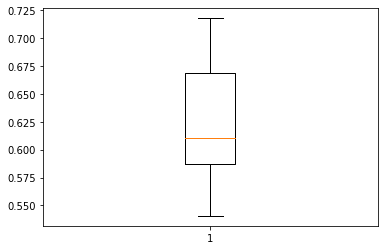

In [0]:
plt.boxplot(acc)

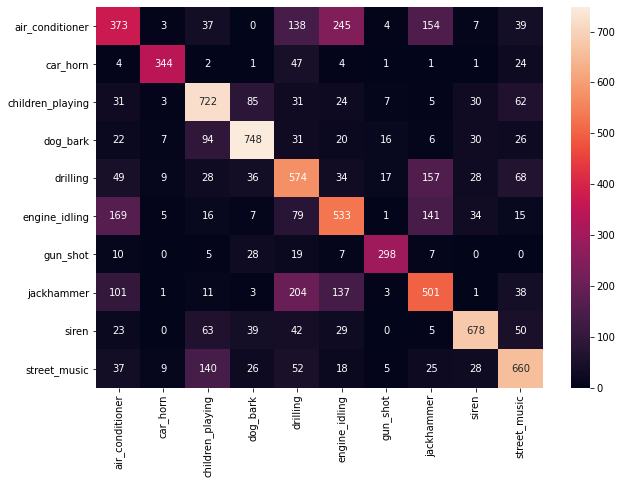

In [0]:
classes = ['air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music']
df_cm = pd.DataFrame(CM, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,  fmt='d')

In [0]:
np.save("acc_baseline_crop.npy", acc)
np.save("cm_baseline_crop.npy", CM)
acc_baseline = acc
CM_baseline = CM

In [0]:
save_folds(data_dir, save_dir, frames= 68, bands= 68, channels = 4, normalize = True, wavelet = 'bior1.5')


Saving fold1
Features of fold1  =  (873, 68, 68, 4)
Labels of fold1  =  (873,)
Saved data/us8k/fold1_x.npy
Saved data/us8k/fold1_y.npy

Saving fold2
Features of fold2  =  (888, 68, 68, 4)
Labels of fold2  =  (888,)
Saved data/us8k/fold2_x.npy
Saved data/us8k/fold2_y.npy

Saving fold3
Features of fold3  =  (925, 68, 68, 4)
Labels of fold3  =  (925,)
Saved data/us8k/fold3_x.npy
Saved data/us8k/fold3_y.npy

Saving fold4
Features of fold4  =  (990, 68, 68, 4)
Labels of fold4  =  (990,)
Saved data/us8k/fold4_x.npy
Saved data/us8k/fold4_y.npy

Saving fold5
Features of fold5  =  (936, 68, 68, 4)
Labels of fold5  =  (936,)
Saved data/us8k/fold5_x.npy
Saved data/us8k/fold5_y.npy

Saving fold6
Features of fold6  =  (823, 68, 68, 4)
Labels of fold6  =  (823,)
Saved data/us8k/fold6_x.npy
Saved data/us8k/fold6_y.npy

Saving fold7
Features of fold7  =  (838, 68, 68, 4)
Labels of fold7  =  (838,)
Saved data/us8k/fold7_x.npy
Saved data/us8k/fold7_y.npy

Saving fold8
Features of fold8  =  (806, 68, 68

In [0]:
acc = np.zeros(10)
roc = np.zeros(10)
CM = 0

for f in range(1,10+1):

    # load data
    train_x, test_x, val_x, train_y, test_y, val_y = load_folds(load_dir, f, frames=68, bands=68, channels=4)
    
    print("Building model...")
    model = build_model(f_size=3, frames=68, bands=68, channels = 4)

    # now fit the model to the training data, evaluating loss against the validation data
    print("Training model...")
    model.fit(train_x, train_y, validation_data=(test_x, test_y), 
              callbacks=[EarlyStopping(restore_best_weights=True, patience=15)], 
              batch_size=100, epochs = 200)

    # now evaluate the trained model against the unseen test data
    print("Evaluating model...")
    roc[f-1], acc[f-1], cm = evaluate(model, val_x, val_y)
    CM += cm
    


*** Train on {3, 4, 5, 6, 7, 8, 9, 10} Validate on 1 Test on 2 ***
val_x shape:  (873, 68, 68, 4)
test_x shape:  (888, 68, 68, 4)
train_x shape:  (6971, 68, 68, 4)
val_y shape:  (873,)
test_y shape:  (888,)
train_y shape:  (6971,)
Building model...
Training model...
Epoch 1/200
70/70 [==============================] - 1s 21ms/step - loss: 2.4348 - accuracy: 0.1310 - val_loss: 2.3760 - val_accuracy: 0.2162
Epoch 2/200
70/70 [==============================] - 1s 11ms/step - loss: 2.3732 - accuracy: 0.1598 - val_loss: 2.3200 - val_accuracy: 0.3468
Epoch 3/200
70/70 [==============================] - 1s 11ms/step - loss: 2.3234 - accuracy: 0.1941 - val_loss: 2.2546 - val_accuracy: 0.3333
Epoch 4/200
70/70 [==============================] - 1s 11ms/step - loss: 2.2710 - accuracy: 0.2234 - val_loss: 2.1808 - val_accuracy: 0.3986
Epoch 5/200
70/70 [==============================] - 1s 11ms/step - loss: 2.2001 - accuracy: 0.2576 - val_loss: 2.0886 - val_accuracy: 0.3727
Epoch 6/200
70/70 [===

{'boxes': [<matplotlib.lines.Line2D at 0x7fe258dc82e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe258dc8940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2c0428e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2c0428588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe258dc83c8>,
  <matplotlib.lines.Line2D at 0x7fe258dc8e48>]}

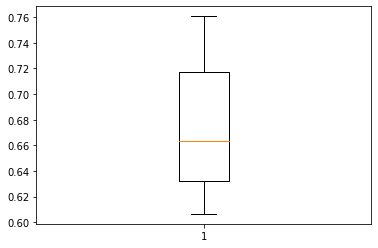

In [0]:
plt.boxplot(acc)

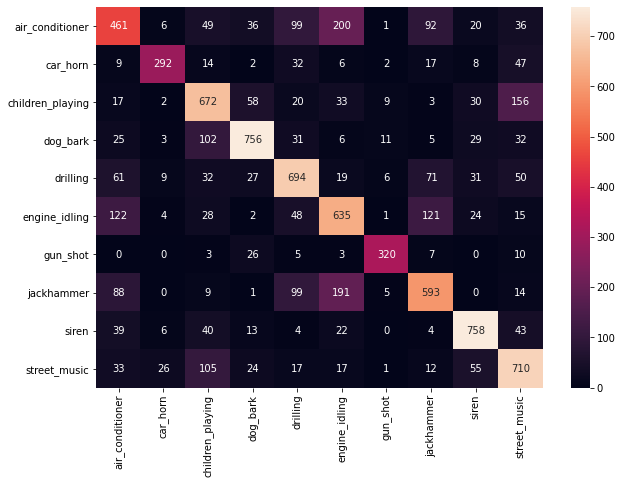

In [0]:
df_cm = pd.DataFrame(CM, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,  fmt='d')

In [0]:
np.save("acc_baseline_wavelet.npy", acc)
np.save("cm_baseline_wavelet.npy", CM)
acc_baseline_wavelet = acc
CM_baseline_wavelet = CM

{'boxes': [<matplotlib.lines.Line2D at 0x7fe1c513d668>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe258bf8c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe258bf8f28>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe258bf8160>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe1c513d748>,
  <matplotlib.lines.Line2D at 0x7fe258a86f28>]}

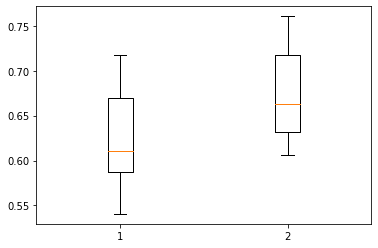

In [0]:
plt.boxplot([acc_baseline, acc_baseline_wavelet])

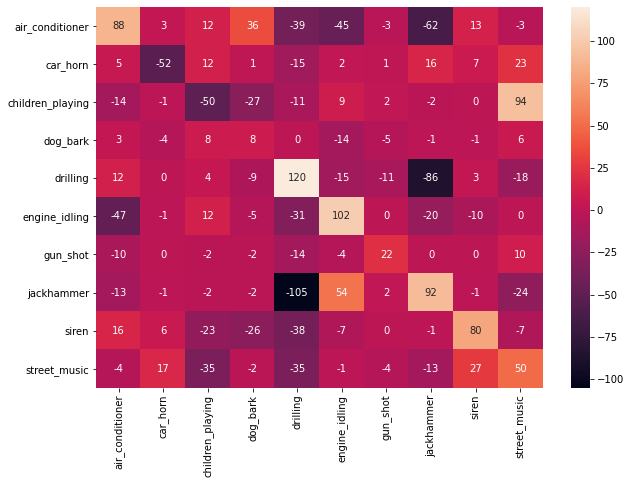

In [0]:
df_cm = pd.DataFrame(CM_baseline_wavelet-CM_baseline, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,  fmt='d')